In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
import importlib
import fncts as fn
importlib.reload(fn)

<module 'fncts' from '/Users/parkerharalds/Documents/Lighthouse/Ship_efficiency/fncts.py'>

In [17]:
df = pd.read_csv('Data/ship_fuel_efficiency.csv')

In [32]:
fn.data_info(df)

DF SHAPE: 
 (1440, 12)
DF COLUMNS: 
 Index(['ship_id', 'ship_type', 'route_id', 'month', 'distance', 'fuel_type',
       'fuel_consumption', 'CO2_emissions', 'weather_conditions',
       'engine_efficiency', 'fuel_efficiency', 'fuel_usage'],
      dtype='object')
DF DESCRIBE: 
           distance  fuel_consumption  CO2_emissions  engine_efficiency  \
count  1440.000000       1440.000000    1440.000000        1440.000000   
mean    151.753354       4844.246535   13365.454882          82.582924   
std     108.472230       4892.352813   13567.650118           7.158289   
min      20.080000        237.880000     615.680000          70.010000   
25%      79.002500       1837.962500    4991.485000          76.255000   
50%     123.465000       3060.880000    8423.255000          82.775000   
75%     180.780000       4870.675000   13447.120000          88.862500   
max     498.550000      24648.520000   71871.210000          94.980000   

       fuel_efficiency   fuel_usage  
count      1440.

In [4]:
# Adding a new column 'fuel_efficiency' to the dataframe
df['fuel_efficiency'] = df['distance'] / df['fuel_consumption']
df.head()

,ship_id,ship_type,route_id,month,distance,fuel_type,fuel_consumption,CO2_emissions,weather_conditions,engine_efficiency,fuel_efficiency
0,NG001,Oil Service Boat,Warri-Bonny,January,132.26,HFO,3779.77,10625.76,Stormy,92.14,0.034992
1,NG001,Oil Service Boat,Port Harcourt-Lagos,February,128.52,HFO,4461.44,12779.73,Moderate,92.98,0.028807
2,NG001,Oil Service Boat,Port Harcourt-Lagos,March,67.30,HFO,1867.73,5353.01,Calm,87.61,0.036033
3,NG001,Oil Service Boat,Port Harcourt-Lagos,April,71.68,Diesel,2393.51,6506.52,Stormy,87.42,0.029948
4,NG001,Oil Service Boat,Lagos-Apapa,May,134.32,HFO,4267.19,11617.03,Calm,85.61,0.031477


In [5]:
# No missing values
df.isnull().sum()

ship_id               0
ship_type             0
route_id              0
month                 0
distance              0
fuel_type             0
fuel_consumption      0
CO2_emissions         0
weather_conditions    0
engine_efficiency     0
fuel_efficiency       0
dtype: int64

Exploring data using functions from fncts.py

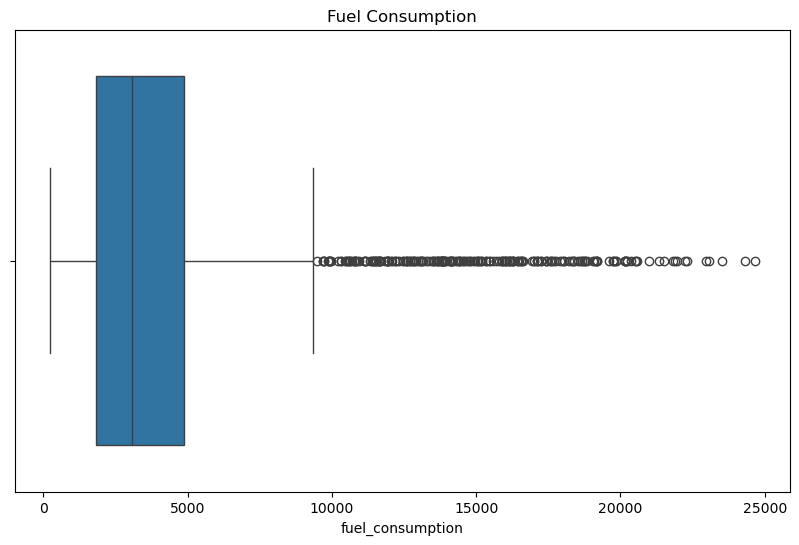

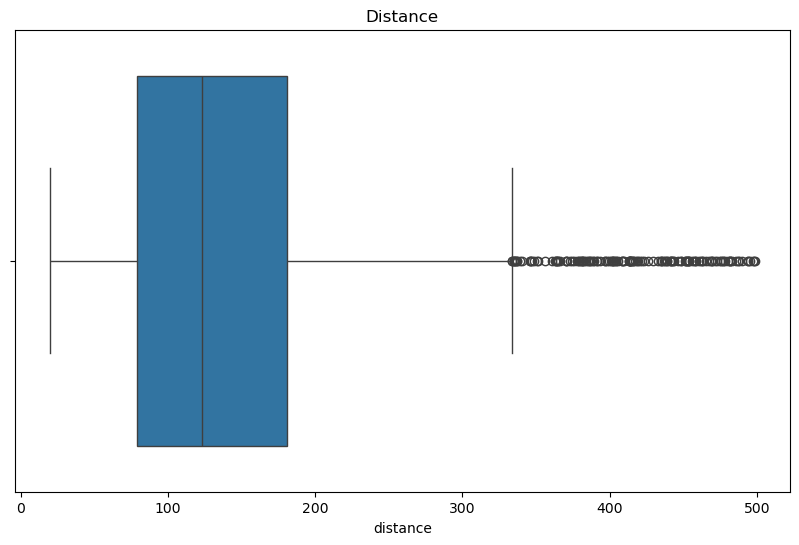

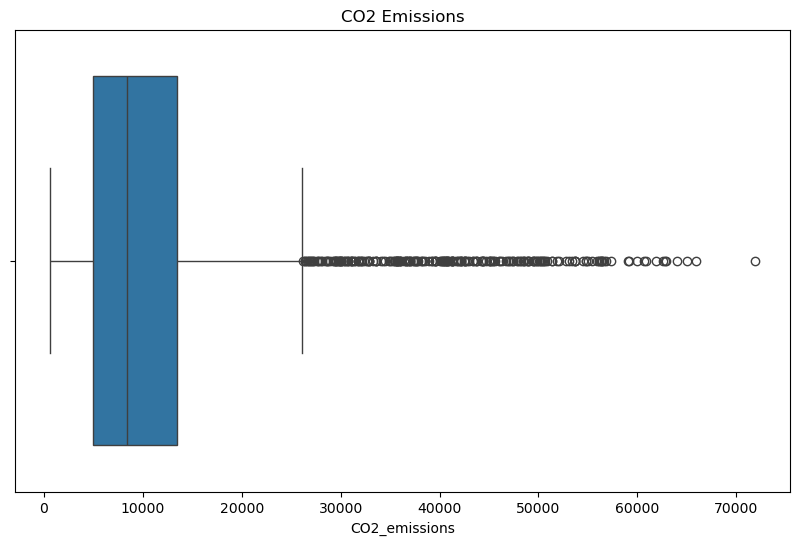

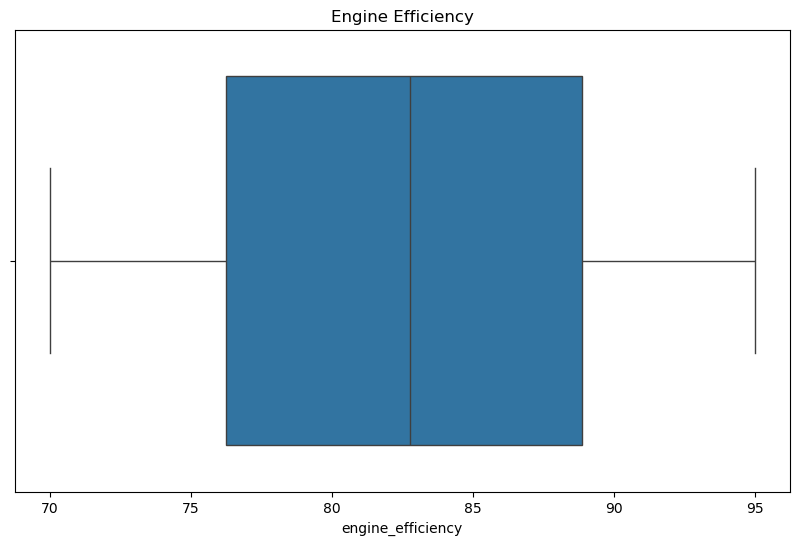

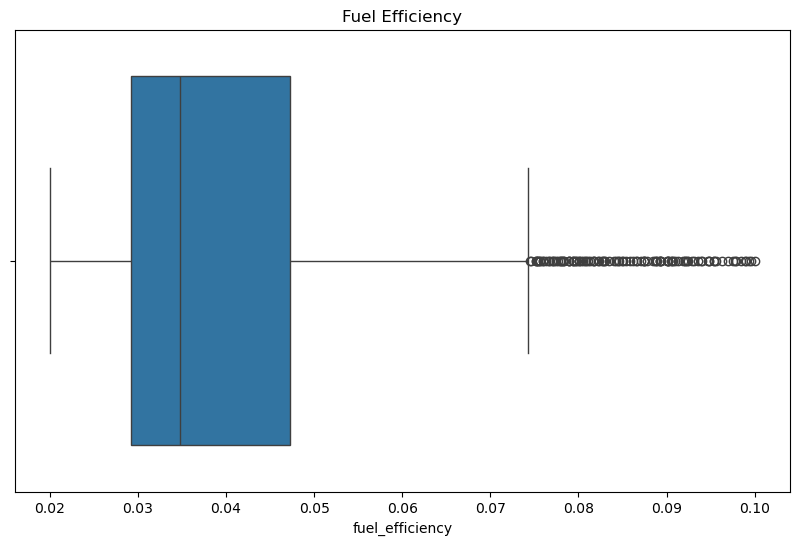

In [8]:
#box_plots function created and imported from fncts.py
fuel = fn.box_plots(df,'fuel_consumption', 'Fuel Consumption')
distance = fn.box_plots(df,'distance', 'Distance')
co2 = fn.box_plots(df,'CO2_emissions', 'CO2 Emissions')
engine_efficiency = fn.box_plots(df,'engine_efficiency', 'Engine Efficiency')
fuel_efficiency = fn.box_plots(df,'fuel_efficiency', 'Fuel Efficiency')

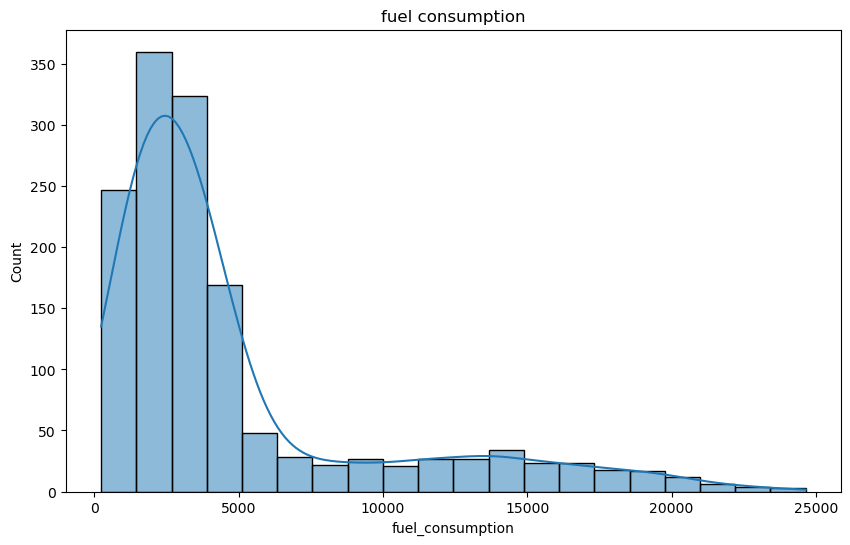

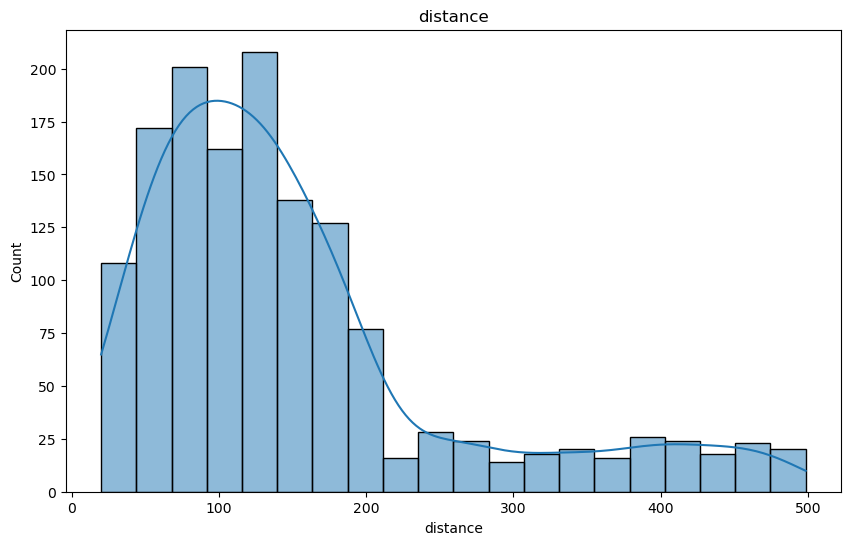

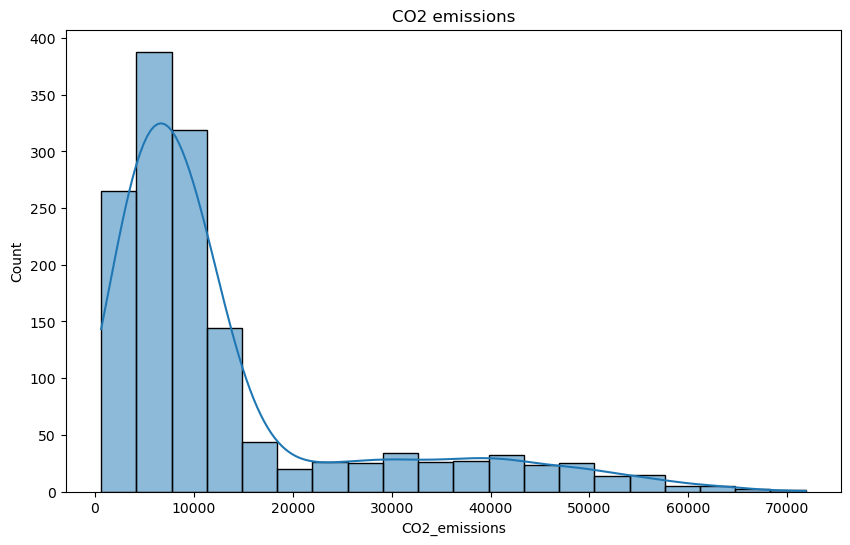

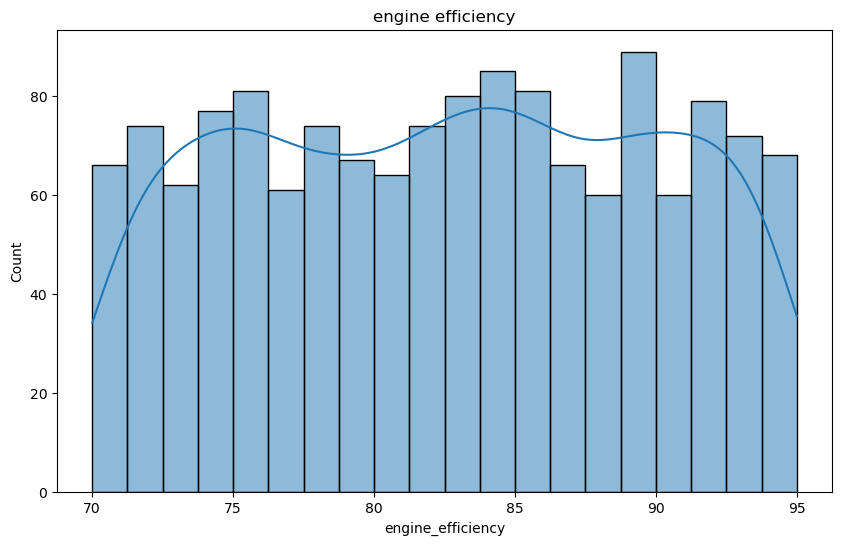

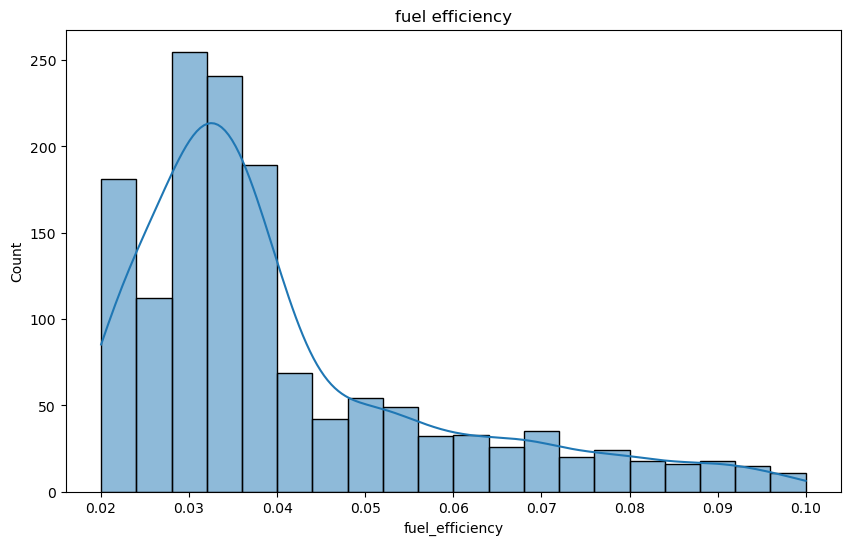

In [9]:
# histogram function from fncts
fuel = fn.hist_plots(df, 'fuel_consumption','fuel consumption')
distance = fn.hist_plots(df, 'distance', 'distance')
co2 = fn.hist_plots(df, 'CO2_emissions', 'CO2 emissions')
engine_efficiency = fn.hist_plots(df, 'engine_efficiency', 'engine efficiency')
fuel_efficiency = fn.hist_plots(df, 'fuel_efficiency', 'fuel efficiency')


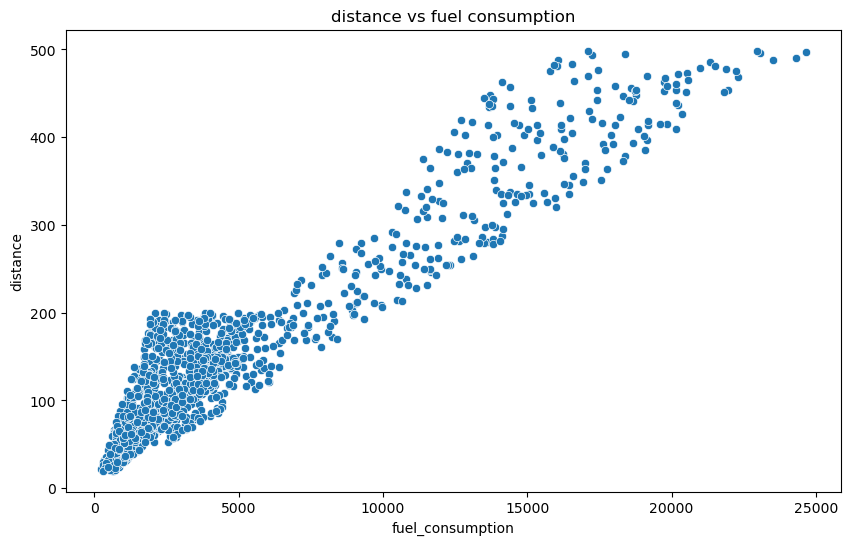

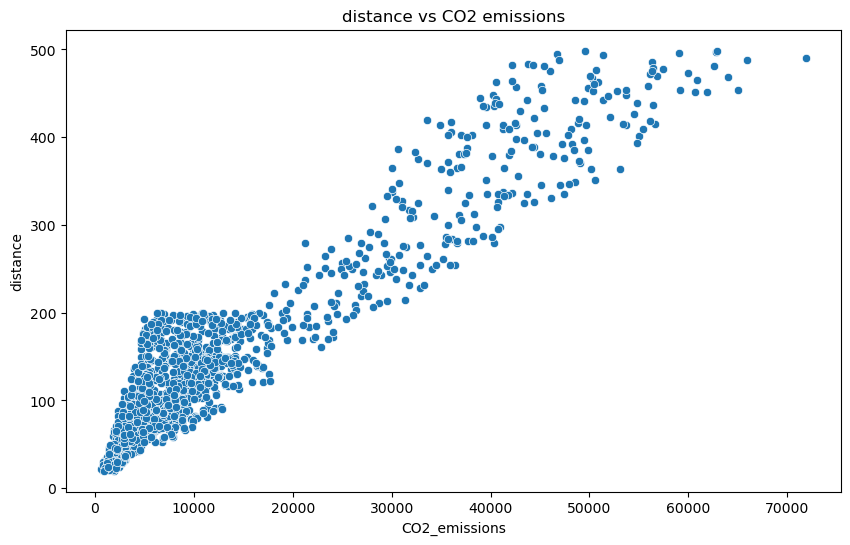

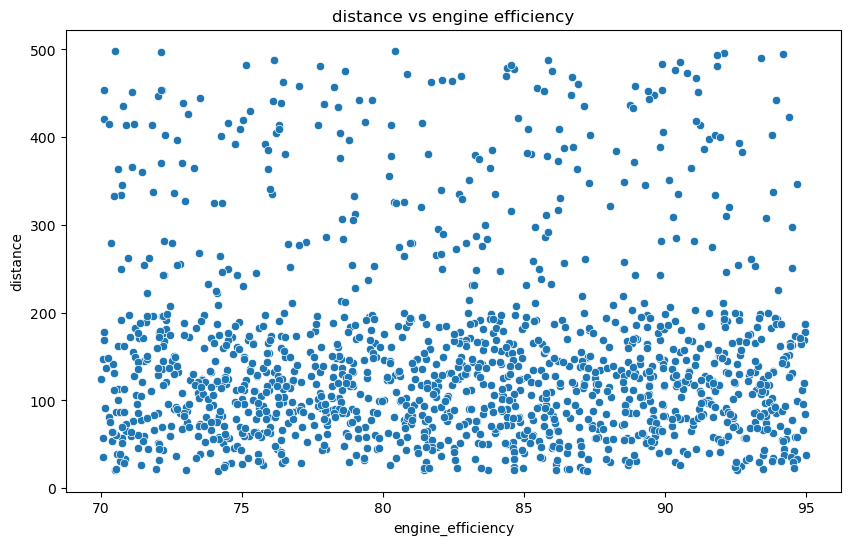

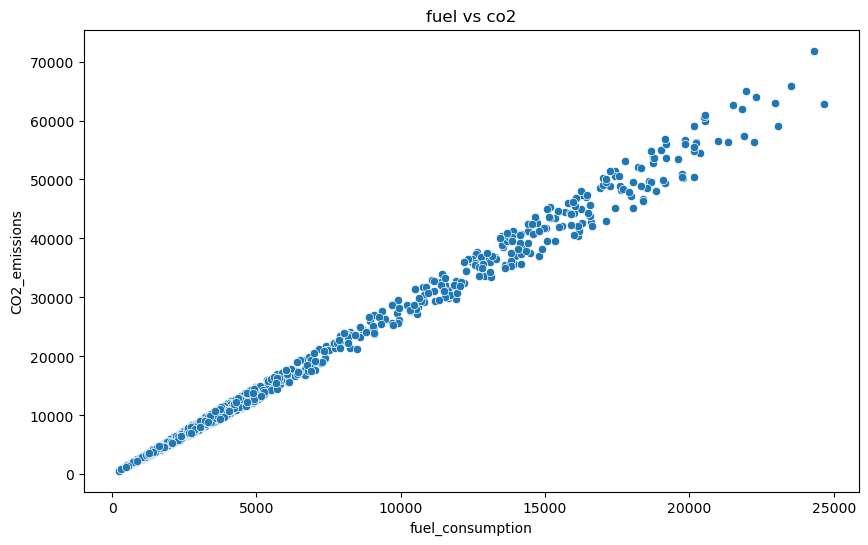

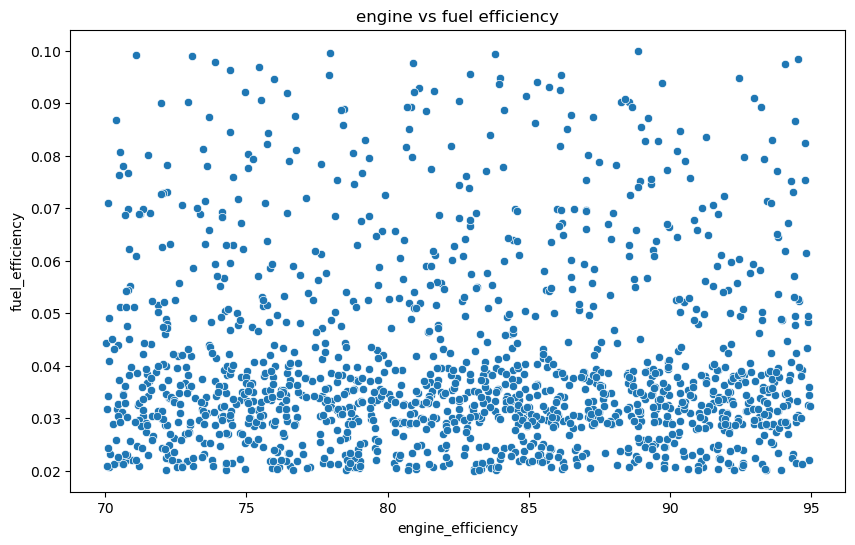

In [10]:
# scatter plots imported from fncts
dist_fuel = fn.scatter_plots(df, 'fuel_consumption', 'distance', 'distance vs fuel consumption')
dist_co2 = fn.scatter_plots(df, 'CO2_emissions', 'distance', 'distance vs CO2 emissions')
dist_eff = fn.scatter_plots(df, 'engine_efficiency', 'distance', 'distance vs engine efficiency')
fuel_co2 = fn.scatter_plots(df, 'fuel_consumption', 'CO2_emissions', 'fuel vs co2')
fuel_efficiency = fn.scatter_plots(df, 'engine_efficiency', 'fuel_efficiency', 'engine vs fuel efficiency')

Relationships from above scatterplots are somewhat expected. Fuel efficiency vs CO2 may provide some interesing insights if we compare trips with similar distances that have different co2 outputs

In [11]:
high_dist = df[df['distance'] > 200]
high_dist.describe()

,distance,fuel_consumption,CO2_emissions,engine_efficiency,fuel_efficiency
count,259.000000,259.000000,259.000000,259.000000,259.000000
mean,349.331776,14193.356448,39264.441931,81.995676,0.025093
std,86.716723,3970.646702,11045.600060,7.106793,0.003803
min,200.040000,6352.000000,16584.340000,70.110000,0.020017
25%,270.255000,11261.735000,30451.240000,75.925000,0.021809
50%,348.930000,13849.880000,38499.820000,82.440000,0.024245
75%,420.140000,17064.985000,47325.070000,88.195000,0.028191
max,498.550000,24648.520000,71871.210000,94.690000,0.033106


In [12]:
# Calculate the percentiles
low_threshold = df['fuel_consumption'].quantile(0.25)
medium_low_threshold = df['fuel_consumption'].quantile(0.5)
medium_high_threshold = df['fuel_consumption'].quantile(0.75)

# Function to categorize fuel usage using quantiles in the data
def fuel_usage_cat(consumption):
    if consumption <= low_threshold:
        return '1'
    elif consumption <= medium_low_threshold:
        return '2'
    elif consumption <= medium_high_threshold:
        return '3'
    else:
        return '4'

df['fuel_usage'] = df['fuel_consumption'].apply(fuel_usage_cat)
df.head()



,ship_id,ship_type,route_id,month,distance,fuel_type,fuel_consumption,CO2_emissions,weather_conditions,engine_efficiency,fuel_efficiency,fuel_usage
0,NG001,Oil Service Boat,Warri-Bonny,January,132.26,HFO,3779.77,10625.76,Stormy,92.14,0.034992,3
1,NG001,Oil Service Boat,Port Harcourt-Lagos,February,128.52,HFO,4461.44,12779.73,Moderate,92.98,0.028807,3
2,NG001,Oil Service Boat,Port Harcourt-Lagos,March,67.30,HFO,1867.73,5353.01,Calm,87.61,0.036033,2
3,NG001,Oil Service Boat,Port Harcourt-Lagos,April,71.68,Diesel,2393.51,6506.52,Stormy,87.42,0.029948,2
4,NG001,Oil Service Boat,Lagos-Apapa,May,134.32,HFO,4267.19,11617.03,Calm,85.61,0.031477,3


In [17]:
df.to_csv('Data/ship_fuel_efficiency.csv', index=False)

Creating some pivots for future use:

In [13]:
ship_type = pd.pivot_table(df, index='ship_type', values=['fuel_consumption', 'distance', 'CO2_emissions', 'engine_efficiency'], aggfunc='mean')
ship_type

,CO2_emissions,distance,engine_efficiency,fuel_consumption
ship_type,,,,
Fishing Trawler,8913.090600,127.643133,82.138300,3229.170933
Oil Service Boat,7187.831250,86.593088,83.419559,2619.435490
Surfer Boat,4577.636574,111.305340,82.444660,1666.133673
Tanker Ship,29795.437377,266.762206,82.183015,10780.408676


In [14]:
# saving for future use in Tableau
ship_type.to_csv('Data/ship_type.csv',index=False)

In [15]:
ship_id = pd.pivot_table(df, index='ship_id', values=['fuel_consumption', 'distance', 'CO2_emissions', 'engine_efficiency'], aggfunc='mean')
ship_id

,CO2_emissions,distance,engine_efficiency,fuel_consumption
ship_id,,,,
NG001,8173.799167,97.480833,86.068333,2947.085833
NG002,9960.932500,140.510000,82.139167,3623.587500
NG003,6955.875000,84.480833,80.870000,2489.332500
NG004,4757.275000,124.852500,79.197500,1763.697500
NG005,31291.338333,274.912500,81.149167,11188.132500
...,...,...,...,...
NG116,23046.091667,214.059167,82.111667,8269.582500
NG117,30192.011667,278.710000,83.462500,10863.022500
NG118,25271.401667,234.118333,83.766667,9270.920000


In [16]:
#created another dataset for ship_id for future use in Tableau
ship_id.to_csv('Data/ship_id1.csv',index=True)